Implementing using Numpy gives faster implementation than other but same mse as python


In [1]:
import pandas as pd
import random
import time
import numpy as np
import matplotlib.pyplot as plt



Importing the same functions form the python implementation file before for data pre processing.
I didn't did any graph visualization to check the coorelation because i saw everything is giving different diffrent relations expect median_income giving linear relation.
So that I did for all.


In [2]:
def ShuffleAndSplit(X, y, test_size=0.2, random_seed=None):
    if random_seed is not None:
        random.seed(random_seed)

    n = len(X)
    indices = list(range(n))
    random.shuffle(indices)

    split = int(n * (1 - test_size))

    X_train = [X[i] for i in indices[:split]]
    y_train = [y[i] for i in indices[:split]]
    X_test = [X[i] for i in indices[split:]]
    y_test = [y[i] for i in indices[split:]]

    return (X_train,y_train),(X_test, y_test)

In [3]:
def LoadData(filepath):
    df=pd.read_csv(filepath)
    #filling NaN as 0.0
    
    df['total_bedrooms'].fillna(0.0, inplace=True)
    #with pandas also we can convert categorical column to numerical columns same like one hot encoding
    df = pd.get_dummies(df, columns=['ocean_proximity'], dtype=int)
    X = df.drop('median_house_value', axis=1)
    y = df['median_house_value']
    #For Normalization
    X = (X - X.min()) / (X.max() - X.min())
    (X_train, y_train), (X_test, y_test)= ShuffleAndSplit(X.values.tolist(), y.values.tolist(), test_size=0.2, random_seed=42)
    return (X_train, y_train), (X_test, y_test)

    


<Axes: xlabel='median_income', ylabel='median_house_value'>

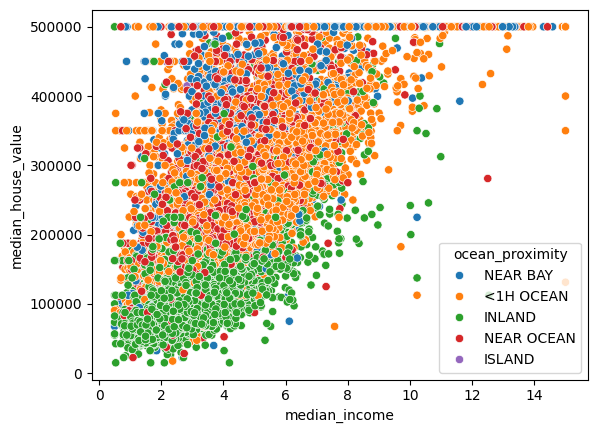

In [4]:
df_new=pd.read_csv(r"C:\myfiles\sem4\housing.csv" )
import seaborn as sns
sns.scatterplot(x='median_income', y='median_house_value', hue='ocean_proximity', data=df_new)

Here X.T means transpose of X

In [5]:
def NpTrain(X, y, lr=0.02, epochs=100):
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    m, n = X.shape
    W = np.zeros((n, 1))
    CostHistory = []
    start = time.time()
    for epoch in range(epochs):
        preds = X.dot(W)
        error = preds - y
        grad = (2 / m) * X.T.dot(error)
        W -= lr * grad
        cost = (1 / ( m)) * np.sum((preds - y) ** 2)
        CostHistory.append(cost)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")
    end = time.time()
    return W.flatten(), CostHistory, end - start


In [6]:
def NpEvaluate(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    r2 = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
    return mae, rmse, r2

In [7]:
if __name__ == "__main__":
     # Update to your dataset path:
    filepath = r"C:\myfiles\sem4\housing.csv" 
    (X_train, y_train), (X_test, y_test) = LoadData(filepath)

    np_weights, np_costs, np_time = NpTrain(X_train, y_train, lr=0.02, epochs=1000)
    np_preds = np.dot(X_test, np_weights)
    Np_mae, Np_rmse, Np_r2 = NpEvaluate(y_test, np_preds)
    print(f"Training time: {np_time:.4f} seconds")

    

    print(f"\nTest MAE: {Np_mae:.2f}")
    print(f"Test RMSE: {Np_rmse:.2f}")
    print(f"Test R² Score: {Np_r2:.4f}")

Epoch 0: Cost = 56035150488.17635
Epoch 10: Cost = 30852155472.661934
Epoch 20: Cost = 20036384390.153675
Epoch 30: Cost = 15278801074.291283
Epoch 40: Cost = 13089239588.928028
Epoch 50: Cost = 11999534394.245506
Epoch 60: Cost = 11390342852.987963
Epoch 70: Cost = 10998963351.779314
Epoch 80: Cost = 10712788881.547684
Epoch 90: Cost = 10482580601.724112
Epoch 100: Cost = 10286014558.036674
Epoch 110: Cost = 10112329589.917406
Epoch 120: Cost = 9955838192.802334
Epoch 130: Cost = 9813164764.999895
Epoch 140: Cost = 9682055134.410416
Epoch 150: Cost = 9560851352.101265
Epoch 160: Cost = 9448250426.440998
Epoch 170: Cost = 9343186032.991703
Epoch 180: Cost = 9244764890.650446
Epoch 190: Cost = 9152228533.903181
Epoch 200: Cost = 9064927721.238573
Epoch 210: Cost = 8982303748.884985
Epoch 220: Cost = 8903873967.359812
Epoch 230: Cost = 8829220130.250145
Epoch 240: Cost = 8757978811.122747
Epoch 250: Cost = 8689833416.068134
Epoch 260: Cost = 8624507470.839651
Epoch 270: Cost = 8561758948

C:\Users\ravik\AppData\Local\Temp\ipykernel_19336\4046431317.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(0.0, inplace=True)


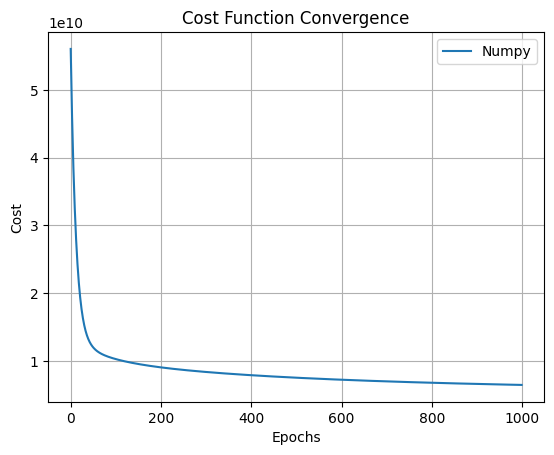

In [8]:

def plot_cost(costs):
    plt.plot(costs, label='Numpy')
    
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost Function Convergence')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_cost(np_costs)